## Observations and Insights 

By analysing the tables and charts, a few distinct observations and inferences can be made from them:
- Each drug regimen had similar number of mice going through the treatments.
- The proportion of male and female mice that undergone the drug treatments were almost equally distributed. Hence, the results of this study are applicable to mice of both genders. 
- By observing the box plots, Capomulin and Ramicane had considerably lower median final tumour volume compared to Infubinol and Ceftamin. Therefore, Capomulin and Ramicane are two of the most effective drugs in reducing tumour sizes among all the drug regimens.
- By observing the effect of Capomulin on one particular mouse, there is a strong negative relationship between timepoints and tumour volume. So, it can be said with confidence that Capomulin is effective in reducing the tumour size of this mouse.
- For mice treated with Capomulin, there is a strong positive correlation between average weight and tumour volume. The heavier the mice, the larger their tumour sizes.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Creating a groupby on Mouse ID and Timepoint
grouped_mice = combined_data.groupby(["Mouse ID", "Timepoint"])

# Count and sort the number of drug regimens each mice received
mice_regimen = grouped_mice["Drug Regimen"].count().sort_values()

# Retrieve the duplicate mice that received more than one regimen
mice_regimen.tail()

Mouse ID  Timepoint
g989      20           2
          5            2
          10           2
          0            2
          15           2
Name: Drug Regimen, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.drop(combined_data[combined_data["Mouse ID"] == "g989"].index.values)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_total_mice = combined_data["Mouse ID"].nunique()
cleaned_total_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_summary = combined_data.groupby(["Drug Regimen"])
mean_summary = pd.Series(grouped_summary["Tumor Volume (mm3)"].mean(), name = "Mean")
median_summary = pd.Series(grouped_summary["Tumor Volume (mm3)"].median(), name = "Median")
variance_summary = pd.Series(grouped_summary["Tumor Volume (mm3)"].var(), name = "Variance")
stddev_summary = pd.Series(grouped_summary["Tumor Volume (mm3)"].std(), name = "Std Dev")
sem_summary = pd.Series(grouped_summary["Tumor Volume (mm3)"].sem(), name = "SEM")

# Concatenate all created series together
summary_stats = pd.concat([mean_summary, median_summary, variance_summary, stddev_summary, sem_summary], axis=1)
summary_stats


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_groupby = combined_data.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
summary_stats_groupby["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

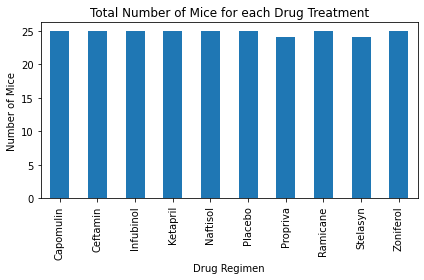

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Split up our data into groups based upon 'drug regimen'
grouped_drugs = combined_data.groupby(["Drug Regimen"])

# Find out how many mice took each drug
total_mice = grouped_drugs["Mouse ID"].nunique()

# Chart the data, providing it with a title and labels
total_mice_chart_pd = total_mice.plot(kind="bar", title="Total Number of Mice for each Drug Treatment")
total_mice_chart_pd.set_xlabel("Drug Regimen")
total_mice_chart_pd.set_ylabel("Number of Mice")

plt.tight_layout()
plt.show()

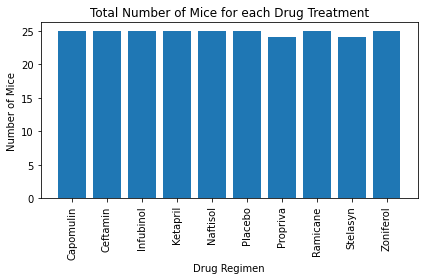

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Assign total mice to new variable
# mice_count = total_mice

# Set mice count index to default index
mice_count = total_mice.reset_index()

# Assign axis values
x_axis = mice_count["Drug Regimen"]
y_axis = mice_count["Mouse ID"]

# Plot bar chart
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)

# Give chart title and labels
plt.title("Total Number of Mice for each Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()
plt.show()

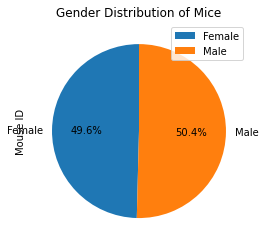

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group data by gender
gender_grouped = combined_data.groupby(["Sex"])

# Find gender distribution
gender_distribution = gender_grouped["Mouse ID"].nunique()

# Plot pie chart based on data
mice_gender_chart_pd = gender_distribution.plot(kind="pie", title="Gender Distribution of Mice", autopct="%1.1f%%", startangle=90)

# Add legend
mice_gender_chart_pd.legend(loc="best")

# Set equal axis
mice_gender_chart_pd.set_aspect("equal") 

# Show chart that was created
plt.show()

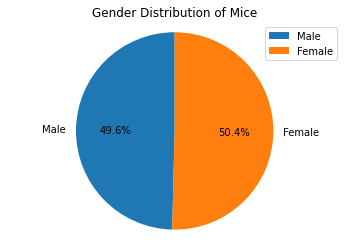

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]

# Using matplotlib.pyplot to create a pie chart based on above data
plt.pie(gender_distribution, labels=gender, autopct="%1.1f%%", startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Add title
plt.title("Gender Distribution of Mice")

# Add legend
plt.legend(loc="best")

# Show chart that was created
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Retrieve data of the four treatment regimens
reduced_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
reduced_data = reduced_data.append(combined_data.loc[combined_data["Drug Regimen"] == "Ramicane"])
reduced_data = reduced_data.append(combined_data.loc[combined_data["Drug Regimen"] == "Infubinol"])
reduced_data = reduced_data.append(combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin"])

# Group dataframe by Mouse ID
grouped_reduced_data = reduced_data.groupby(["Mouse ID"])

# Retrieve max tumour volume
tumour_volume = grouped_reduced_data["Timepoint"].max()

# Reset index to default
tumour_volume_df = tumour_volume.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_combined_data = pd.merge(tumour_volume_df, reduced_data, on=("Mouse ID", "Timepoint"), how="left")
new_combined_data


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# Retrieve Capomulin, Ramicane, Infubinol, and Ceftamin data
capomulin = new_combined_data.loc[new_combined_data["Drug Regimen"] == "Capomulin"]
ramicane = new_combined_data.loc[new_combined_data["Drug Regimen"] == "Ramicane"]
infubinol = new_combined_data.loc[new_combined_data["Drug Regimen"] == "Infubinol"]
ceftamin = new_combined_data.loc[new_combined_data["Drug Regimen"] == "Ceftamin"]

# add subset 
# Retrieve drug regimen and newly created column
capomulin = capomulin["Tumor Volume (mm3)"]
ramicane = ramicane["Tumor Volume (mm3)"]
infubinol = infubinol["Tumor Volume (mm3)"]
ceftamin = ceftamin["Tumor Volume (mm3)"]

In [16]:
# Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

# Determine outliers using upper and lower bounds
outliers = capomulin.loc[(capomulin < lower_bound) | (capomulin > upper_bound)]

# Use a conditional statement to print number of outliers
num_of_cells = len(outliers)
if num_of_cells > 0:
    print(f'There are {num_of_cells} outliers.')
else:
    print(f'There are no outliers.')

Values below 20.70456164999999 mm3 could be outliers.
Values above 51.83201549 mm3 could be outliers.
There are no outliers.


In [17]:
# Ramicane
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

# Determine outliers using upper and lower bounds
outliers = ramicane.loc[(ramicane < lower_bound) | (ramicane > upper_bound)]

# Use a conditional statement to print number of outliers
num_of_cells = len(outliers)
if num_of_cells > 0:
    print(f'There are {num_of_cells} outliers.')
else:
    print(f'There are no outliers.')

Values below 17.912664470000003 mm3 could be outliers.
Values above 54.30681135 mm3 could be outliers.
There are no outliers.


In [18]:
# Infubinol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

# Determine outliers using upper and lower bounds
outliers = infubinol.loc[(infubinol < lower_bound) | (infubinol > upper_bound)]

# Use a conditional statement to print number of outliers
num_of_cells = len(outliers)
if num_of_cells > 0:
    print(f'There are {num_of_cells} outliers.')
else:
    print(f'There are no outliers.')

Values below 36.83290494999999 mm3 could be outliers.
Values above 82.74144559000001 mm3 could be outliers.
There are 1 outliers.


In [19]:
# Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} mm3 could be outliers.")
print(f"Values above {upper_bound} mm3 could be outliers.")

# Determine outliers using upper and lower bounds
outliers = ceftamin.loc[(ceftamin < lower_bound) | (ceftamin > upper_bound)]
outliers

# Use a conditional statement to print number of outliers
num_of_cells = len(outliers)
if num_of_cells > 0:
    print(f'There are {num_of_cells} outliers.')
else:
    print(f'There are no outliers.')

Values below 25.355449580000002 mm3 could be outliers.
Values above 87.66645829999999 mm3 could be outliers.
There are no outliers.


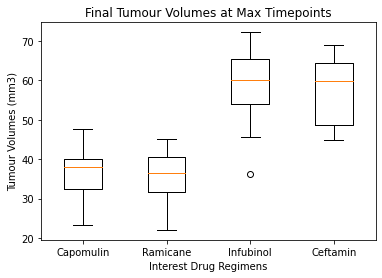

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_volume = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumour Volumes at Max Timepoints")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_xlabel("Interest Drug Regimens")
ax1.set_ylabel("Tumour Volumes (mm3)")
ax1.boxplot(final_volume)
plt.show()

## Line and Scatter Plots

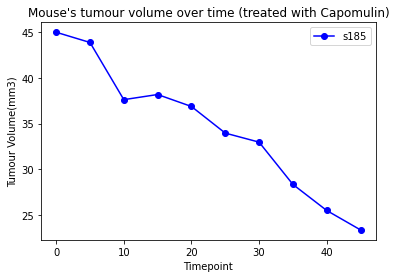

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Set index to Drug Regimen for easy referencing of rows
capomulin_mice = combined_data.set_index(["Drug Regimen"])

# Filter rows to only include mice treated with capomulin
capomulin_mice = capomulin_mice.loc["Capomulin"]

# Retrieve columns of interest
capomulin_mice_line = capomulin_mice[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Retrieve one of the mice tested with Capomulin by their Mouse ID
capomulin_mice_line = capomulin_mice_line.loc[capomulin_mice["Mouse ID"] == "s185"]

timepoint = capomulin_mice_line["Timepoint"]
tumour_volume = capomulin_mice_line["Tumor Volume (mm3)"]

# Plot the line chart
line_chart, = plt.plot(timepoint, tumour_volume, color="blue", marker="o",label="s185")
plt.title("Mouse's tumour volume over time (treated with Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume(mm3)")
plt.legend(handles=[line_chart], loc="best")

# Show the chart
plt.show()

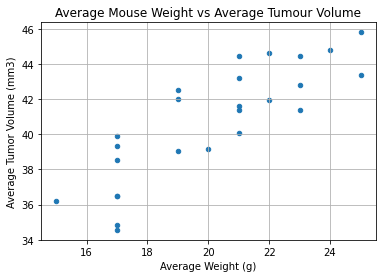

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Groupby data by Mouse ID
capomulin_mice_grouped = capomulin_mice.groupby(["Mouse ID"])

# Find average weight and tumour volume
capomulin_mice_grouped = capomulin_mice_grouped[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Rename columns
capomulin_mice_grouped = capomulin_mice_grouped.rename(columns={"Weight (g)" : "Average Weight (g)",
                                                                "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Create a scatter plot
capomulin_mice_grouped.plot(kind="scatter", x="Average Weight (g)", y="Average Tumor Volume (mm3)", grid=True,
                            title="Average Mouse Weight vs Average Tumour Volume")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumour volume for the Capomulin regimen is 0.84.
The r-squared is: 0.7088568047708717


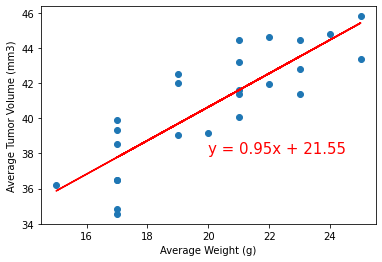

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Finding the correlation coefficient
mouse_weight = capomulin_mice_grouped["Average Weight (g)"]
average_tumour_volume = capomulin_mice_grouped["Average Tumor Volume (mm3)"]
correlation = round(st.pearsonr(mouse_weight,average_tumour_volume)[0],2)
print(f'The correlation coefficient between mouse weight and average tumour volume for the Capomulin regimen is {correlation}.')

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumour_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,average_tumour_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()